### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

### Data loading

In [2]:
df = pd.read_csv('dataset/Wine/wine-clustering.csv')
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [3]:
df.shape

(178, 13)

### Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Checking for outliers

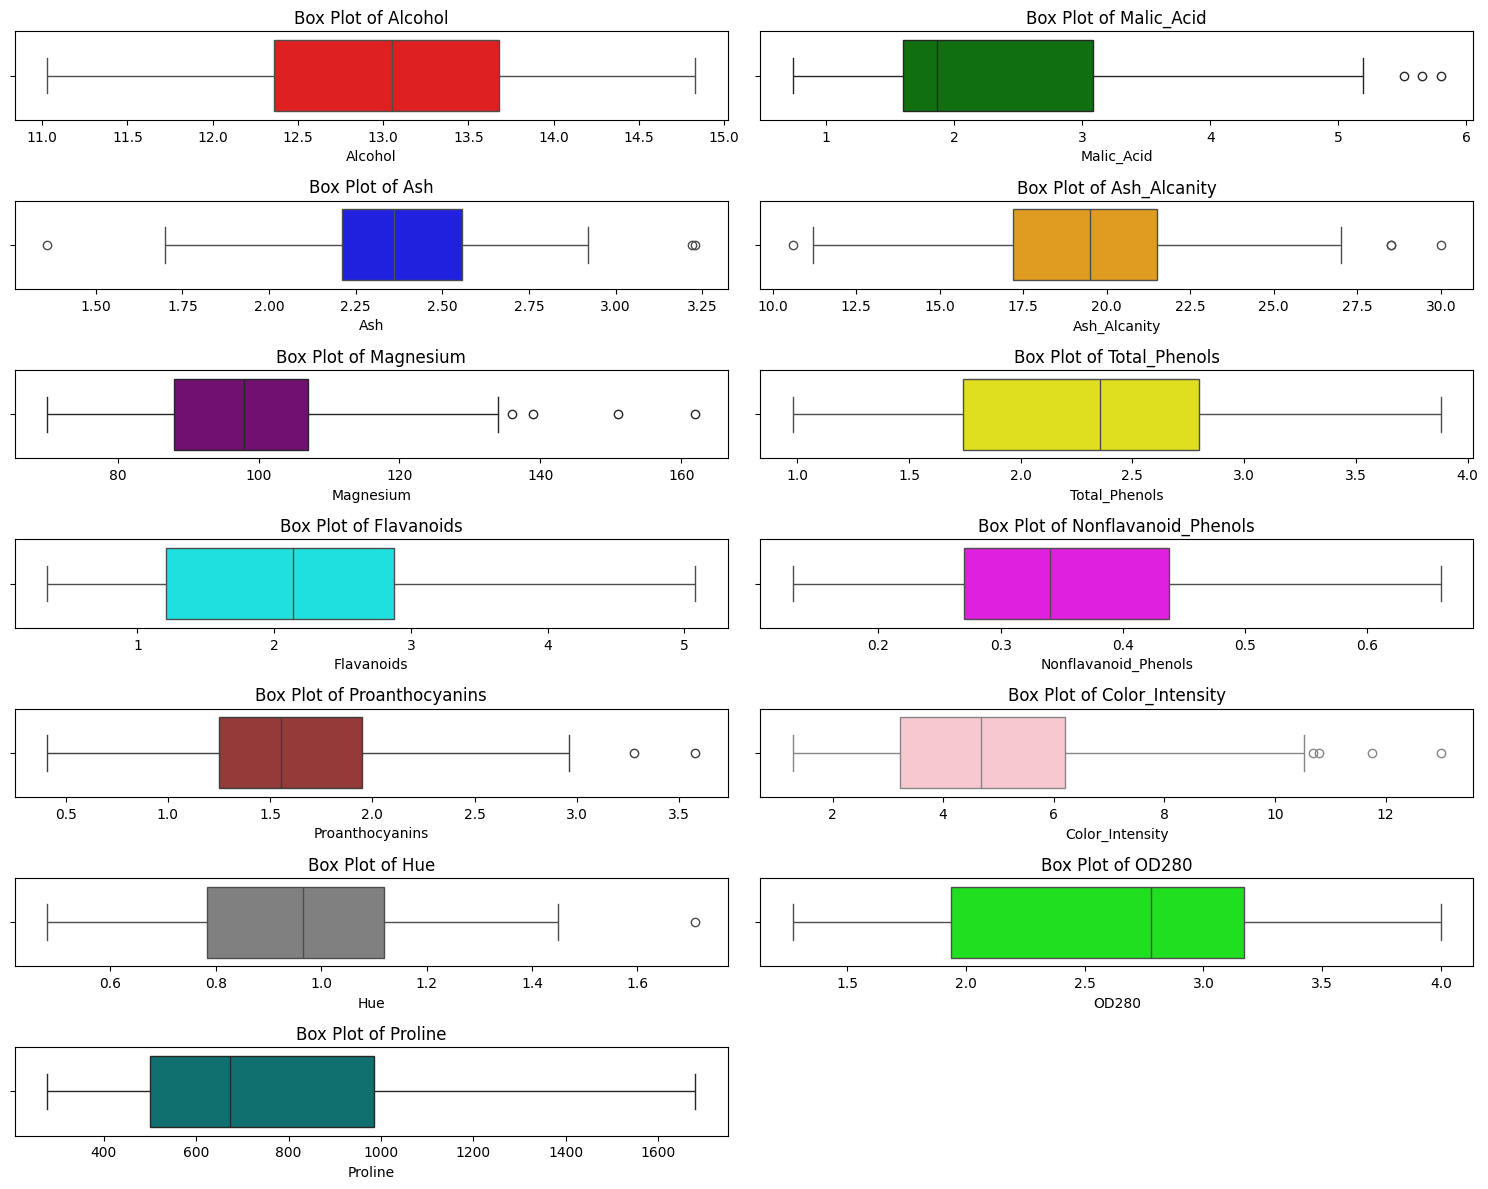

In [5]:
# Create a figure object with subplots
fig, axes = plt.subplots(nrows=(len(df.columns) + 1) // 2, ncols=2, figsize=(15, 12))

# Flatten the axes array
axes = axes.flatten()

# Define a list of colors for the boxplots
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'pink', 'gray', 'lime', 'teal']

# Iterate over the columns and plot the box plots with different colors
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i], color=colors[i])
    axes[i].set_title(f'Box Plot of {column}')

# If there is an odd number of columns, add an empty subplot
if len(df.columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()


There are some outliers, we will eliminate them. There are in: Malic_acid, Ash, Ash_alcanity, Magnesium, Proanthocyanins, Hue and Color_intensity

### Removing outliers

In [6]:
#Identifying and removing outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

In [7]:
outliers.sum(axis=0)

17

In [8]:
df = df.mask(outliers).dropna()
print(df.shape)

(161, 13)


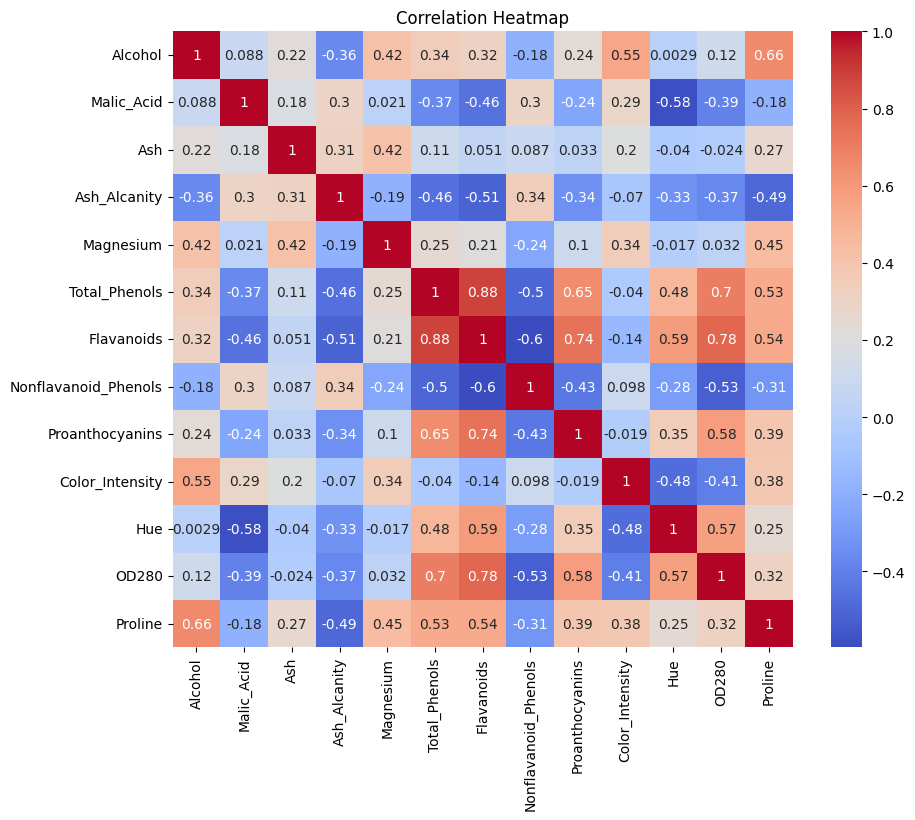

In [9]:
# make confusion matrix of the data
corr = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Standardize the data

In [10]:
# standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1             2             3             4   \
count  1.610000e+02  1.610000e+02  1.610000e+02  1.610000e+02  1.610000e+02   
mean  -3.971978e-16 -4.413309e-17  1.820490e-16  2.206654e-16 -1.765324e-16   
std    1.003120e+00  1.003120e+00  1.003120e+00  1.003120e+00  1.003120e+00   
min   -2.049857e+00 -1.499357e+00 -2.758493e+00 -2.672685e+00 -2.314802e+00   
25%   -8.428553e-01 -6.668235e-01 -5.543333e-01 -7.095058e-01 -8.545719e-01   
50%    3.725025e-02 -4.275897e-01 -1.369043e-02 -7.729542e-02 -4.333325e-02   
75%    8.419182e-01  6.920248e-01  6.933041e-01  5.881892e-01  6.056577e-01   
max    2.250087e+00  2.759005e+00  2.315233e+00  2.584643e+00  2.877126e+00   

                 5             6           7             8             9   \
count  1.610000e+02  1.610000e+02  161.000000  1.610000e+02  1.610000e+02   
mean   3.530647e-16  8.826618e-17    0.000000 -1.323993e-16 -9.654113e-18   
std    1.003120e+00  1.003120e+00    1.003120  1.003120e+00  1.003120e+00   
min   -2.078638e+00 -1.733988e+00   -1.878728 -2.170971e+00 -1.769080e+00   
25%   -9.047796e-01 -8.383905e-01   -0.725814 -5.876775e-01 -8.263062e-01   
50%    9.458657e-02  9.791652e-02   -0.149357 -3.447866e-02 -1.014602e-01   
75%    8.084196e-01  8.815648e-01    0.591802  6.140993e-01  5.617976e-01   
max    2.521619e+00  1.919644e+00    2.485875  2.693364e+00  2.608422e+00   

               10            11            12  
count  161.000000  1.610000e+02  1.610000e+02  
mean     0.000000 -1.765324e-16  1.323993e-16  
std      1.003120  1.003120e+00  1.003120e+00  
min     -1.928064 -1.922370e+00 -1.490160e+00  
25%     -0.777958 -8.754661e-01 -7.963592e-01  
50%      0.096123  2.138798e-01 -2.605217e-01  
75%      0.740183  7.797738e-01  8.545158e-01  
max      2.258323  1.939856e+00  2.852291e+00

### PCA

In [11]:
#Determining number of principal components based on the variance explaind by each component
n_components = 13
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# Creating a dataframe with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

0.6888812227749925


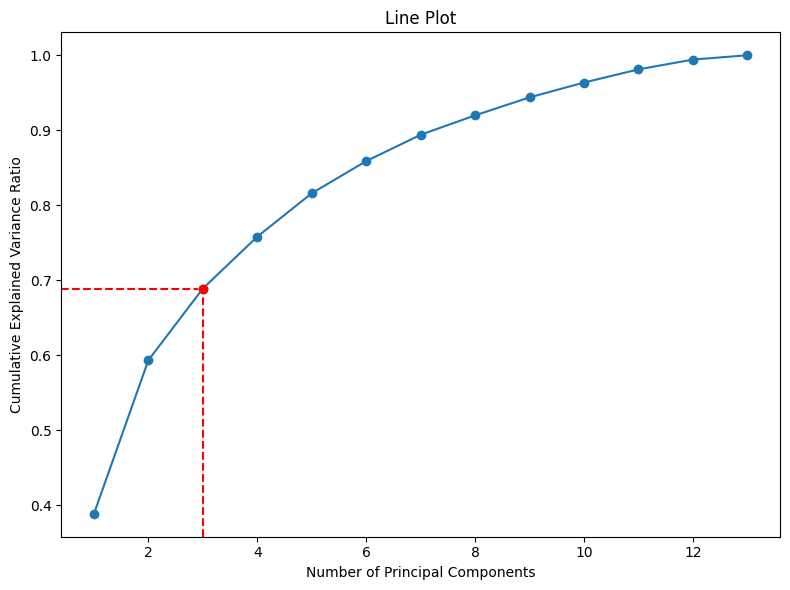

In [12]:
fig, axes = plt.subplots(figsize=(8, 6))

# Plot the scatter plot


# Plot the line plot
axes.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o',zorder = 1)
axes.set_xlabel('Number of Principal Components')
axes.set_ylabel('Cumulative Explained Variance Ratio')
axes.set_title('Line Plot')
y_value = np.sum(pca.explained_variance_ratio_[:3])
axes.scatter(3, y_value, color='red',zorder = 2)
print(y_value)
# Add dotted lines
axes.axvline(x=3, linestyle='--', ymax=0.48, color='red')
axes.axhline(y=y_value, linestyle='--', xmax=0.19, color='red')

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

In [13]:
# selecting the number of principal components based on the variance explained
n = 3
pc_df = pc_df.iloc[:, :n]
principal_components = principal_components[:, :n]

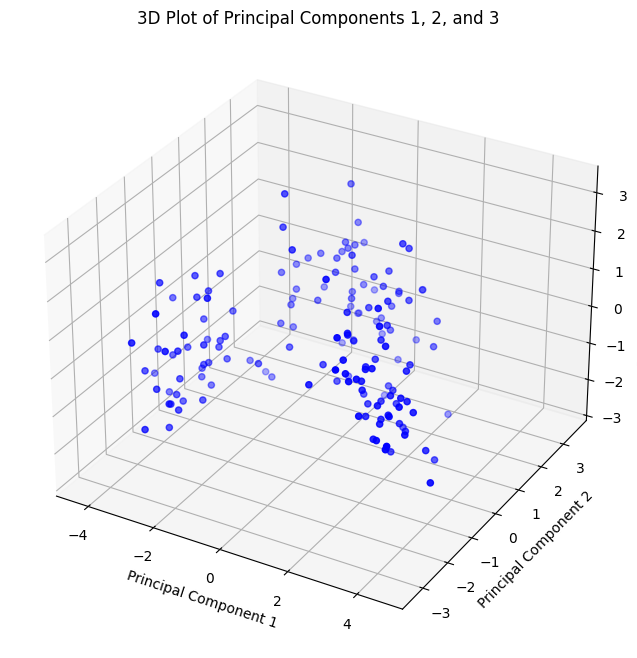

In [14]:
#Visualizing the 3 components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c='b', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of Principal Components 1, 2, and 3')
plt.show()

## Kmeans

c:\Users\Luca\miniconda3\envs\tmp\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luca\miniconda3\envs\tmp\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luca\miniconda3\envs\tmp\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Luca\miniconda3\envs\tmp\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is k

Text(0, 0.5, 'WCSS')

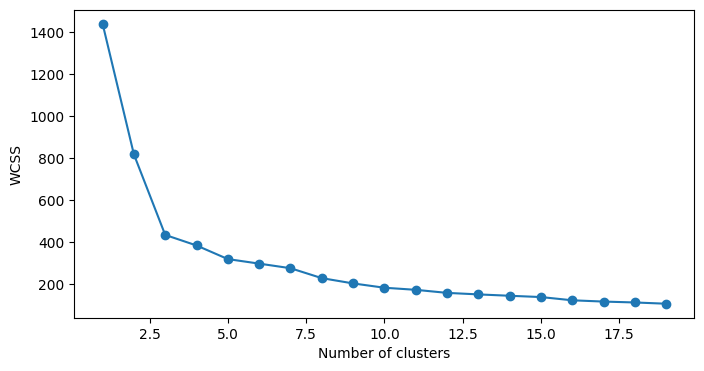

In [15]:
WCSS = []
for cluster in range(1,20):
    kmeans = KMeans( n_init='auto',n_clusters = cluster, init='k-means++')
    kmeans.fit(principal_components)
    WCSS.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
clusters = pd.DataFrame({'Cluster':range(1,20), 'WCSS':WCSS})
plt.figure(figsize=(8,4))
plt.plot(clusters['Cluster'], clusters['WCSS'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [16]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans( n_init='auto',n_clusters = 3, init='k-means++')
kmeans.fit(principal_components)
pred = kmeans.predict(principal_components)

c:\Users\Luca\miniconda3\envs\tmp\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


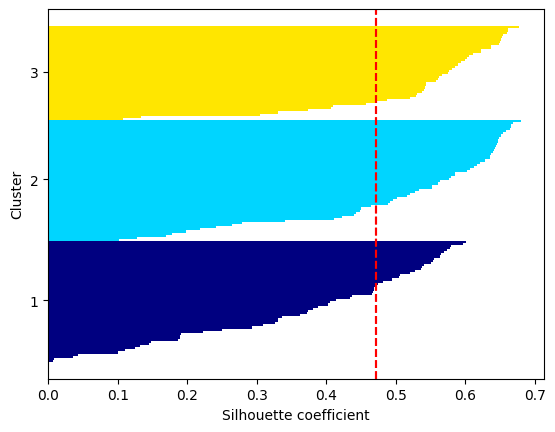

In [21]:
#make a silhoutte plot of the clusters
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np

X = principal_components
y = pred
cluster_labels = np.unique(y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average Silhouette")
plt.show()



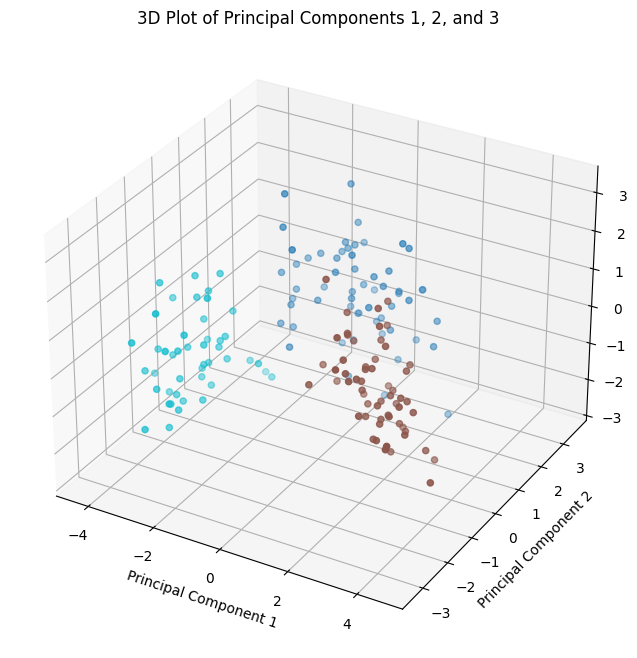

In [18]:
#Make a 3d scatter plot of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=pred, cmap='tab10', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of Principal Components 1, 2, and 3')
plt.show()


In [19]:
#Calculating the silhouette score
print(silhouette_score(principal_components, pred))

0.4719643893848974


KeyboardInterrupt: 

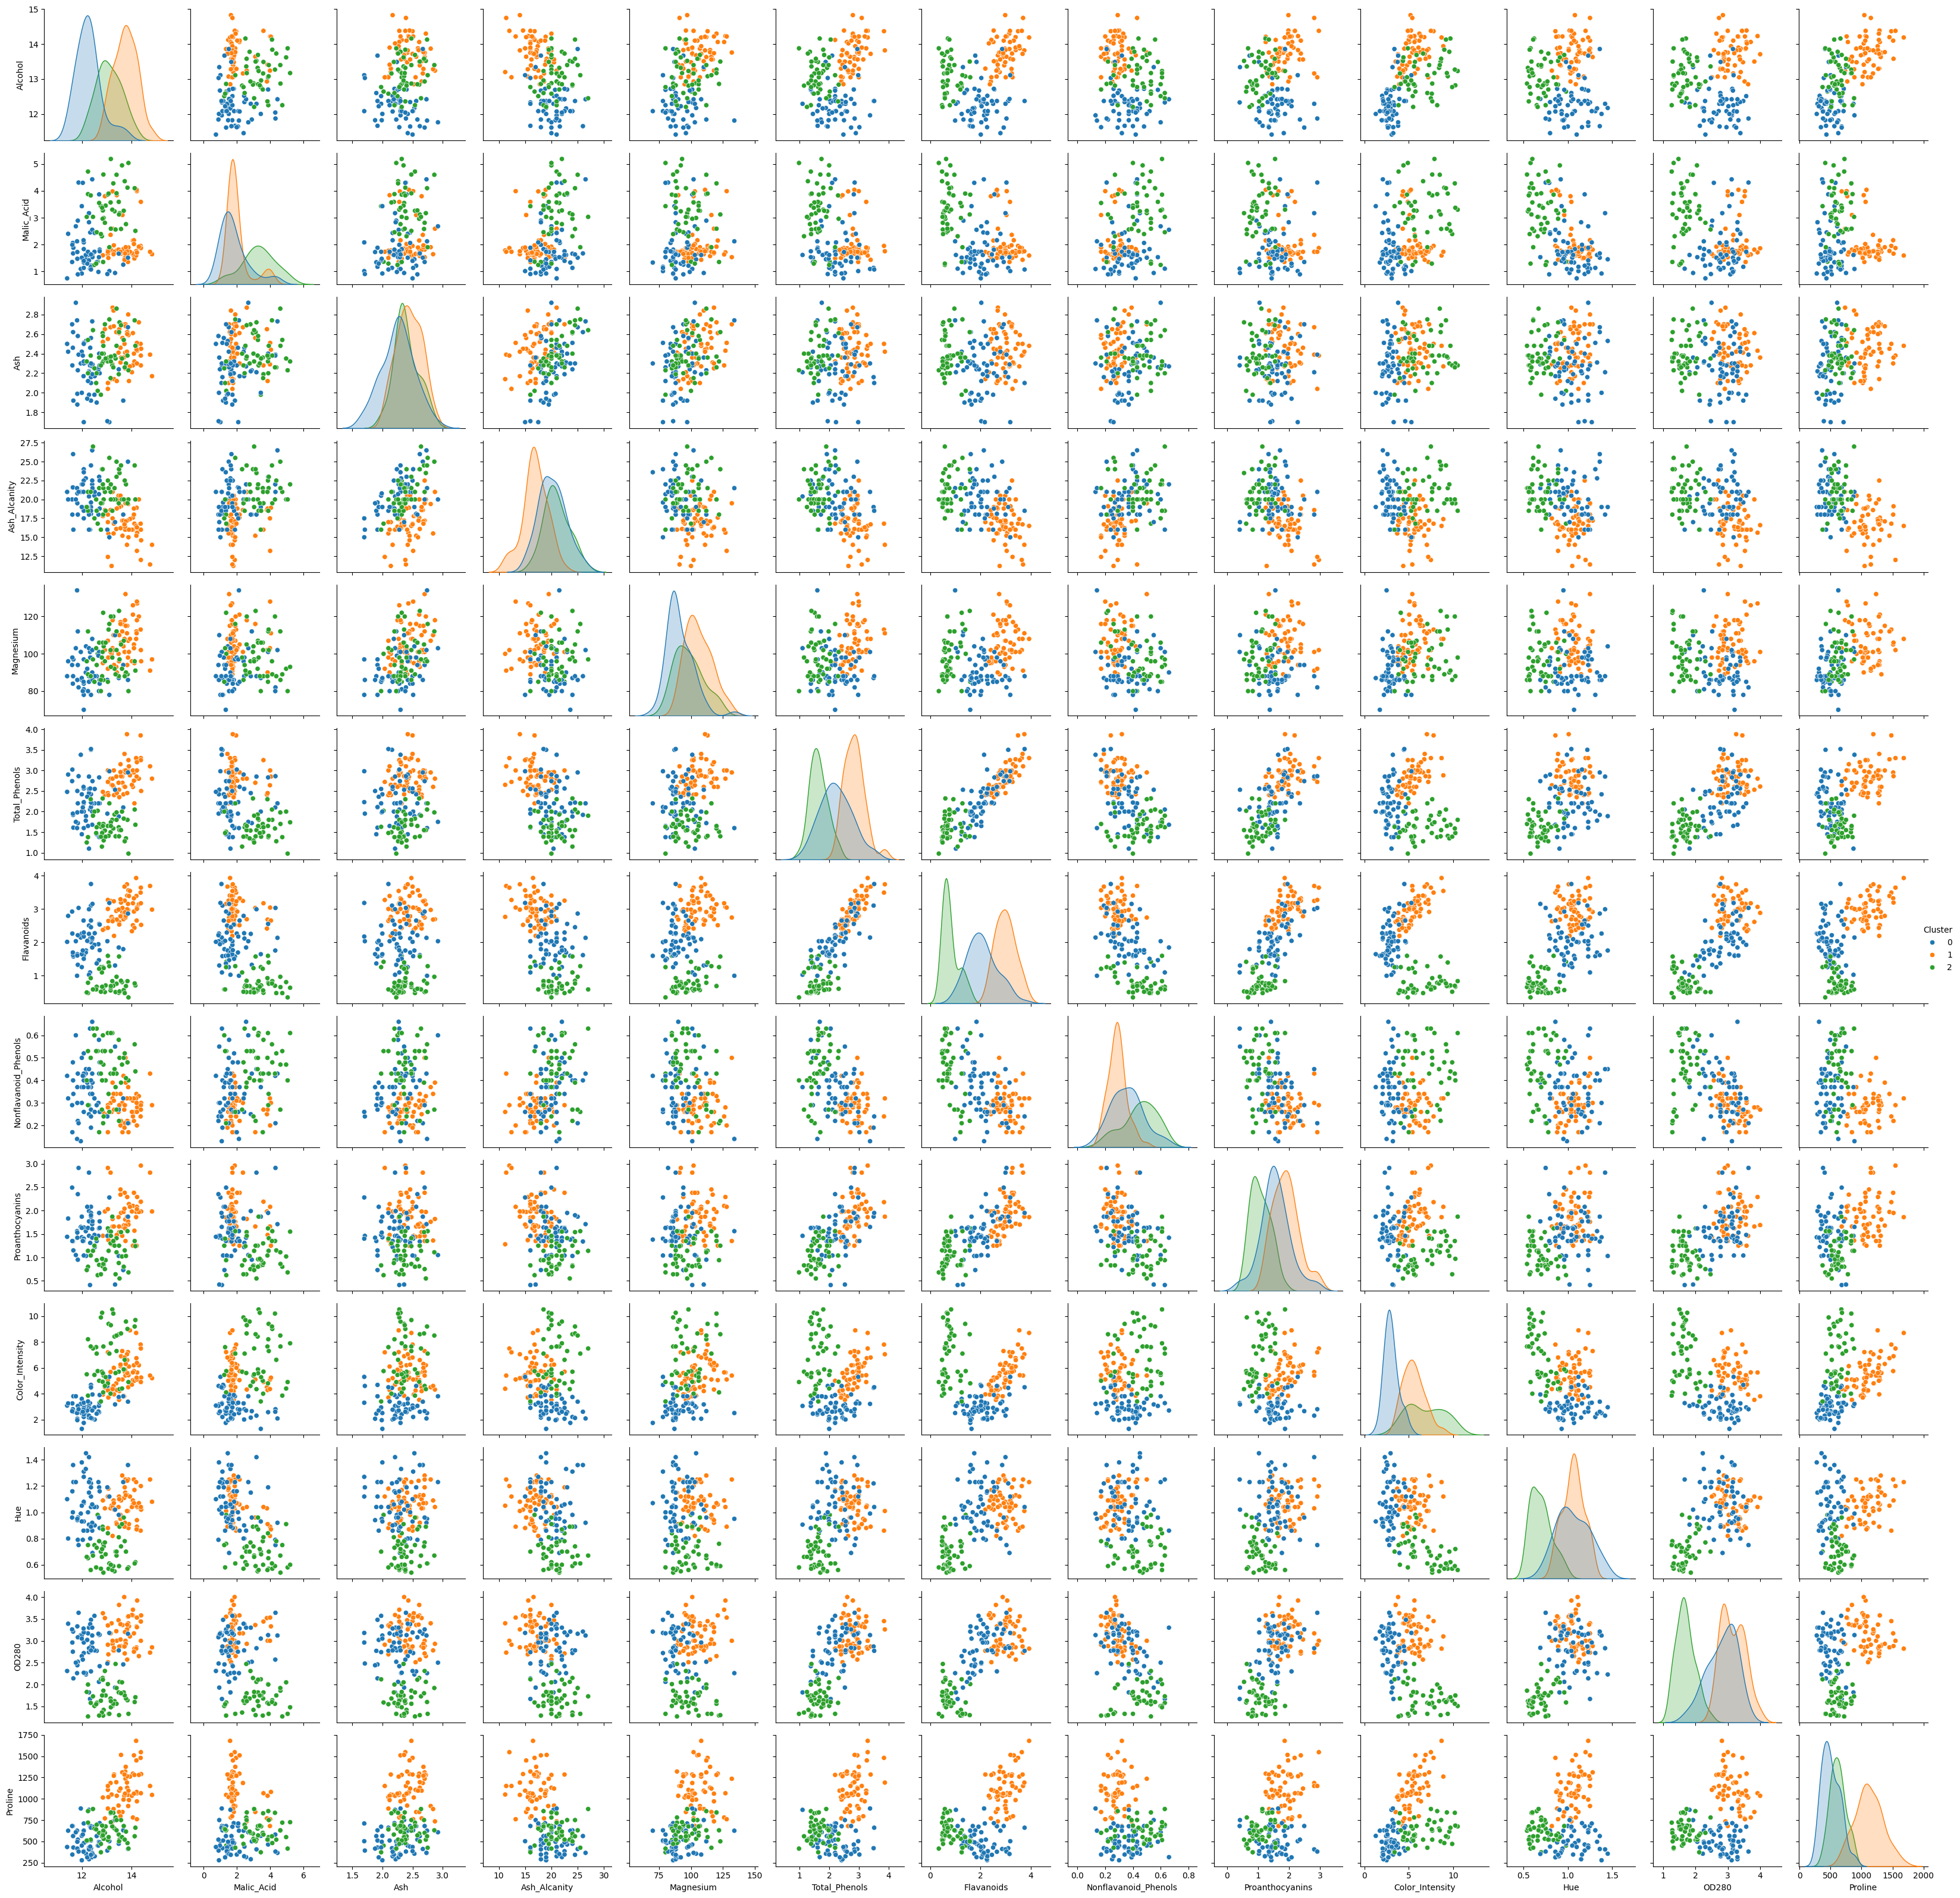

In [20]:
#Adding the cluster column to the original dataframe
df['Cluster'] = pred
df.head()

#Calculating the mean of each feature for each cluster
df.groupby('Cluster').mean()
#make a pairplot of the clusters to visualize the relationship between the features
sns.pairplot(df, hue='Cluster', palette='tab10')
plt.show()


## DBScan

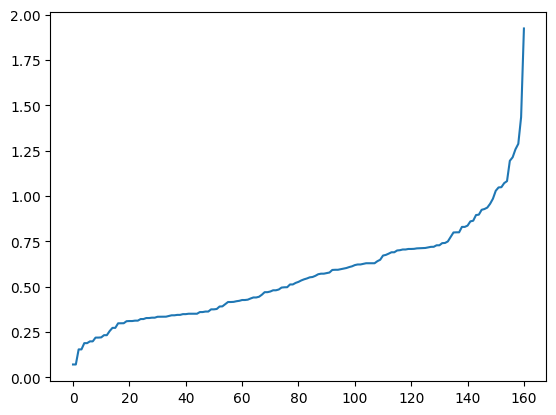

In [ ]:
# do a k-dist method to find the best eps for dbscan

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(principal_components)
distances, indices = nbrs.kneighbors(principal_components)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [27]:
from sklearn.metrics import pairwise_distances
#eps_values = [0.70, 0.75, 0.80, 0.85, 0.9, 0.95, 1]
#eps_values = [ 0.9, 0.95, 1, 1.05, 1.10, 1.15, 1.20]
eps_values = [1, 1.05, 1.10, 1.15, 1.20,1.25,1.30]

min_samples_values = [5,10,15,20]

best_silhouette_score = -1
best_num_clusters = -1
best_avg_distance = float('inf')
best_dbscan = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(principal_components)
        cluster_labels = dbscan.labels_
        
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(principal_components, cluster_labels)
            noise_indices = np.where(cluster_labels == -1)[0]
            distances = pairwise_distances(principal_components[noise_indices], principal_components)
            avg_distance = np.mean(np.sort(distances, axis=1)[:, :8])
            
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_num_clusters = len(set(cluster_labels)) - 1
                best_avg_distance = avg_distance
                best_dbscan = dbscan

print("Best DBSCAN:")
print("Silhouette Score:", best_silhouette_score)
print("Number of Clusters:", best_num_clusters)
print("Average Distance to 8 Closest Points:", best_avg_distance)

cluster_labels = best_dbscan.labels_
print(best_dbscan.get_params())

Best DBSCAN:
Silhouette Score: 0.3980520993058497
Number of Clusters: 3
Average Distance to 8 Closest Points: 1.2544168049770197
{'algorithm': 'auto', 'eps': 1.25, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 10, 'n_jobs': None, 'p': None}


In [28]:
from sklearn.metrics import pairwise_distances
#eps_values = [0.70, 0.75, 0.80, 0.85, 0.9, 0.95, 1]
#eps_values = [ 0.9, 0.95, 1, 1.05, 1.10, 1.15, 1.20]
eps_values = [1, 1.05, 1.10, 1.15, 1.20,1.25,1.30]
min_samples_values = [5,10,15,20]

best_silhouette_score = -1
best_num_clusters = -1
best_avg_distance = float('inf')
best_dbscan = None

sil_matrix = []
avg_dist_matrix = []
num_cluster_matrix = []

for eps in eps_values:
    tmp_sil = []
    tmp_avg_dist = []
    tmp_num_cluster = []
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(principal_components)
        cluster_labels = dbscan.labels_
       
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(principal_components, cluster_labels)
            noise_indices = np.where(cluster_labels == -1)[0]
            distances = pairwise_distances(principal_components[noise_indices], principal_components)
            avg_distance = np.mean(np.sort(distances, axis=1)[:, :8])
            
            tmp_sil.append(silhouette_avg)
            tmp_avg_dist.append(avg_distance)
            tmp_num_cluster.append(len(set(cluster_labels)) - 1)
            
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_num_clusters = len(set(cluster_labels)) - 1
                best_avg_distance = avg_distance
                best_dbscan = dbscan
        else: 
            silhouette_avg = -1
            avg_distance = float('inf')
            tmp_sil.append(silhouette_avg)
            tmp_avg_dist.append(avg_distance)
            tmp_num_cluster.append(len(set(cluster_labels)) - 1)
    
    sil_matrix.append(tmp_sil)
    avg_dist_matrix.append(tmp_avg_dist)
    num_cluster_matrix.append(tmp_num_cluster)

print("Best DBSCAN:")
print("Silhouette Score:", best_silhouette_score)
print("Number of Clusters:", best_num_clusters)
print("Average Distance to 8 Closest Points:", best_avg_distance)

cluster_labels = best_dbscan.labels_
print(best_dbscan.get_params())

Best DBSCAN:
Silhouette Score: 0.3980520993058497
Number of Clusters: 3
Average Distance to 8 Closest Points: 1.2544168049770197
{'algorithm': 'auto', 'eps': 1.25, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 10, 'n_jobs': None, 'p': None}


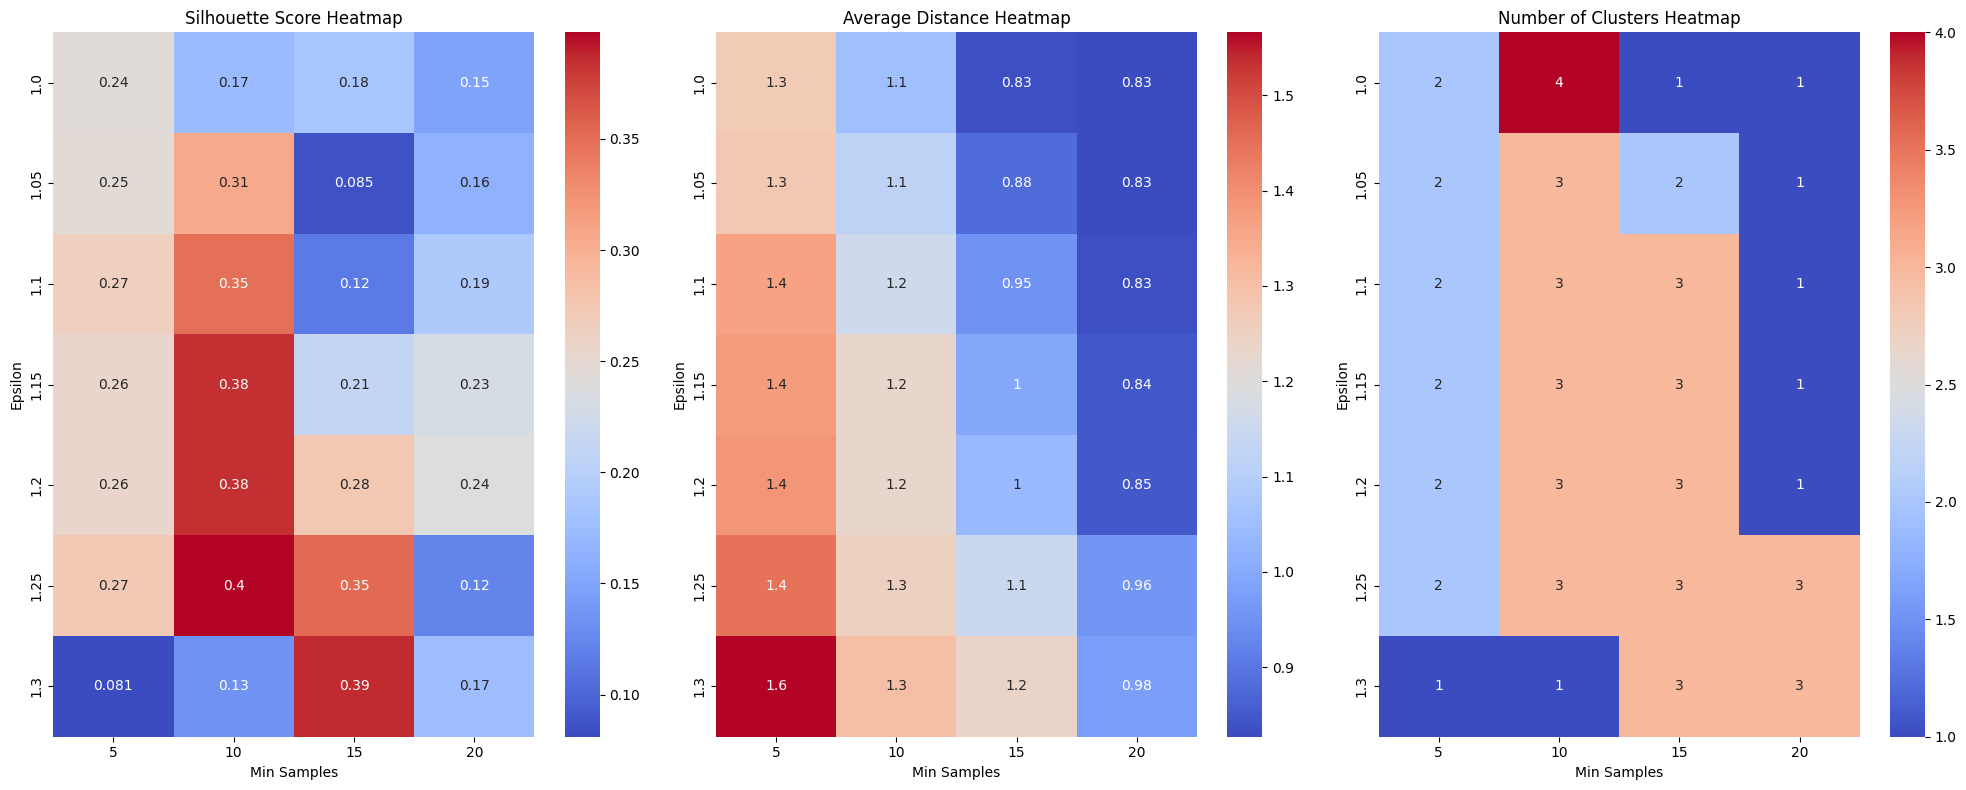

In [29]:
sil_matrix = np.array(sil_matrix)
sil_matrix = pd.DataFrame(sil_matrix, columns=min_samples_values, index=eps_values)
sil_matrix = sil_matrix.round(3)

#do the same for avg_dist_matrix and num_cluster_matrix
avg_dist_matrix = np.array(avg_dist_matrix)
avg_dist_matrix = pd.DataFrame(avg_dist_matrix, columns=min_samples_values, index=eps_values)
avg_dist_matrix = avg_dist_matrix.round(3)

num_cluster_matrix = np.array(num_cluster_matrix)
num_cluster_matrix = pd.DataFrame(num_cluster_matrix, columns=min_samples_values, index=eps_values)
num_cluster_matrix = num_cluster_matrix.round(3)

#do confusion matrix of sil_matrix, avg_dist_matrix and num_cluster_matrix in the same graph
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Flatten the axes array
axes = axes.flatten()

# Create the heatmap
sns.heatmap(sil_matrix, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Silhouette Score Heatmap')
axes[0].set_xlabel('Min Samples')
axes[0].set_ylabel('Epsilon')

# Create the heatmap
sns.heatmap(avg_dist_matrix, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Average Distance Heatmap')
axes[1].set_xlabel('Min Samples')
axes[1].set_ylabel('Epsilon')

# Create the heatmap
sns.heatmap(num_cluster_matrix, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Number of Clusters Heatmap')
axes[2].set_xlabel('Min Samples')
axes[2].set_ylabel('Epsilon')

# Adjust the layout and display the figure

plt.tight_layout()
plt.show()



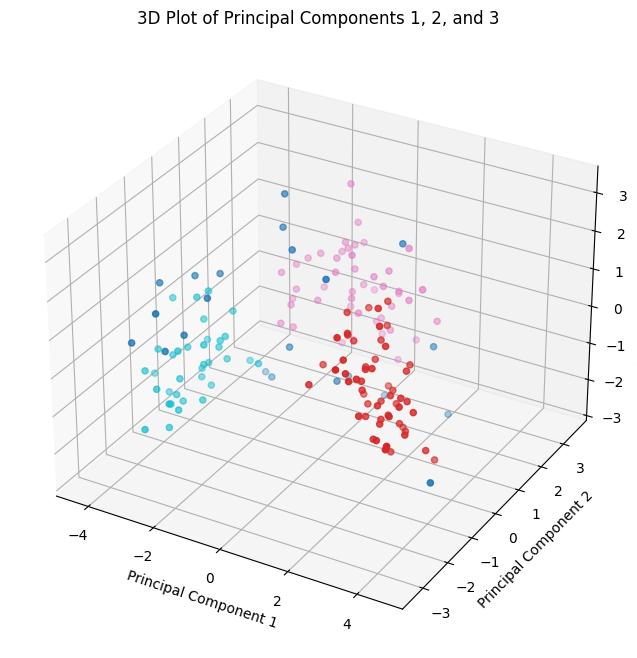

In [30]:
#Make a 3d scatter plot of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=cluster_labels, cmap='tab10', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of Principal Components 1, 2, and 3')
plt.show()
